In [33]:
import pandas as pd
import numpy as np  
import requests #! pip install requests
import xml.etree.ElementTree as ET
import time
import logging
import re
import os
import matplotlib.pyplot as plt

In [34]:
metadata = pd.read_csv('data/speech_records.csv')

In [35]:
time_df = metadata[["speaker", "year", "month", "day", "body", "sub_body", "doc_number", "doc_type", "sg_number"]].copy()

In [36]:
ordered_sgs = ['Guterres, António, 1949-', 'Ban, Ki-moon, 1944-', 'Annan, Kofi, 1938-2018', 'Boutros-Ghali, Boutros, 1922-2016',
       'Pérez de Cuéllar, Javier, 1920-2020', 'Waldheim, Kurt, 1918-2007', 'Thant, U, 1909-1974', 
       'Hammarskjöld, Dag, 1905-1961', 'Lie, Trygve, 1896-1968']

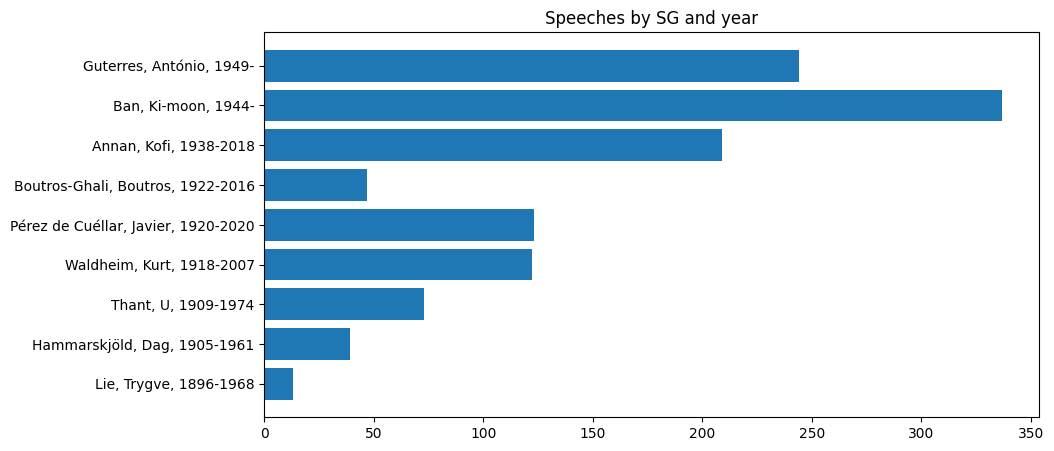

In [82]:
pldf = time_df.copy()
pldf = pldf.groupby(["speaker", "sg_number"])['sg_number'].count().reset_index(name='countv')
pldf = pldf.sort_values("sg_number")
plt.figure(figsize=(10,5))
plt.title("Speeches by SG and year")
plt.barh(pldf.speaker, pldf.countv)
plt.show()

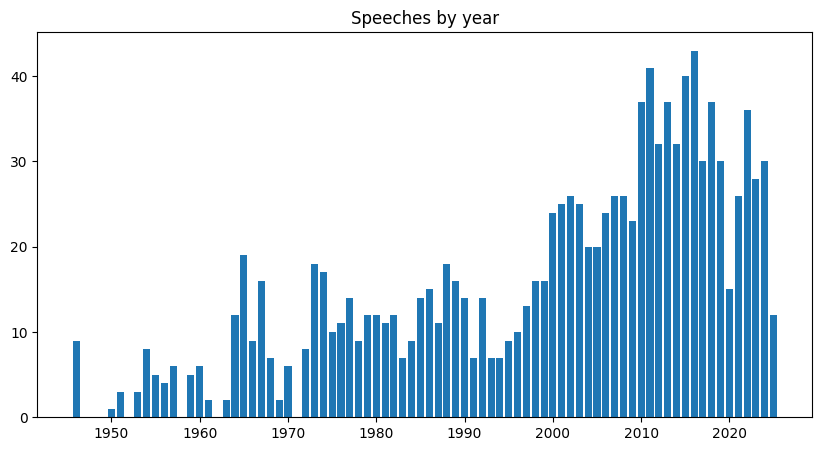

In [73]:
pldf = time_df.copy()
pldf = pldf.groupby("year")['speaker'].count().reset_index(name='countv')
pldf = pldf.sort_values("year")
plt.figure(figsize=(10,5))
plt.title("Speeches by year")
plt.bar(pldf.year, pldf.countv)
plt.show()

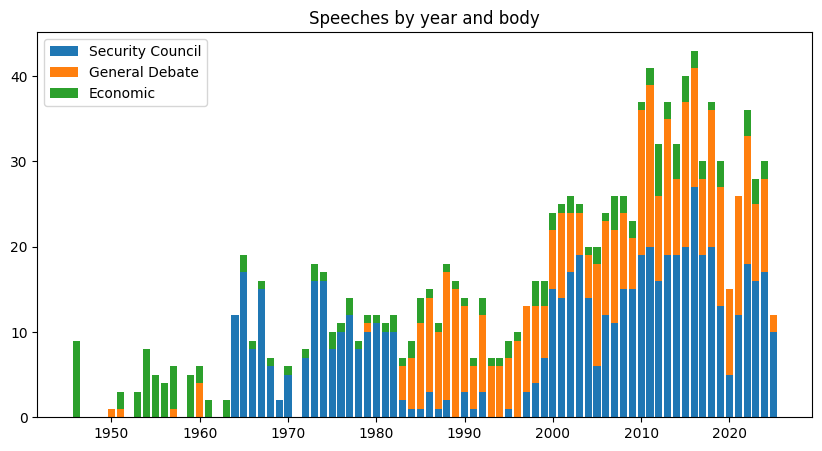

In [98]:
pldf = time_df.copy()
pldf = pldf.groupby(["year", "body"])['speaker'].count().reset_index(name='countv')
pldf = pldf.sort_values("year")
years = sorted(pldf.year.unique())
body_e = pldf[pldf.body == 'E'].set_index('year')['countv'].reindex(years, fill_value=0)
body_a = pldf[pldf.body == 'A'].set_index('year')['countv'].reindex(years, fill_value=0)
body_s = pldf[pldf.body == 'S'].set_index('year')['countv'].reindex(years, fill_value=0)
plt.figure(figsize=(10,5))
plt.title("Speeches by year and body")
plt.bar(years, body_s, label='Security Council')
plt.bar(years, body_a, bottom=body_s, label='General Debate')
plt.bar(years, body_e, bottom=(body_s+body_a), label='Economic')
plt.legend()
plt.show()

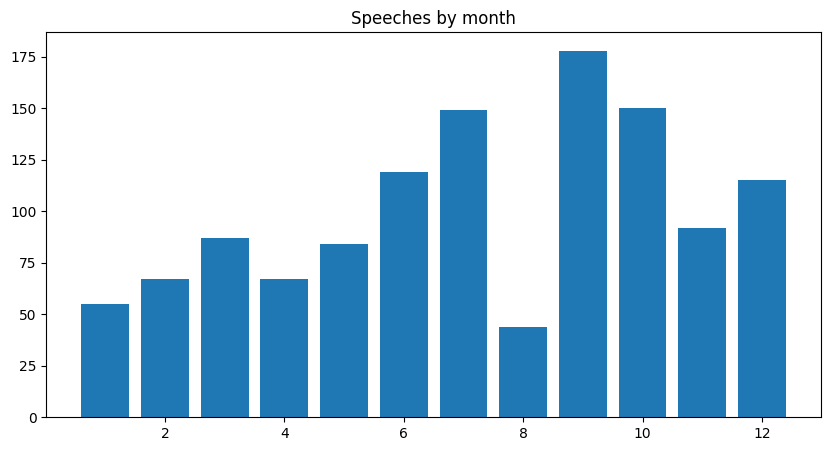

In [84]:
pldf = time_df.copy()
pldf = pldf.groupby("month")['speaker'].count().reset_index(name='countv')
pldf = pldf.sort_values("month")
plt.figure(figsize=(10,5))
plt.title("Speeches by month")
plt.bar(pldf.month, pldf.countv)
plt.show()

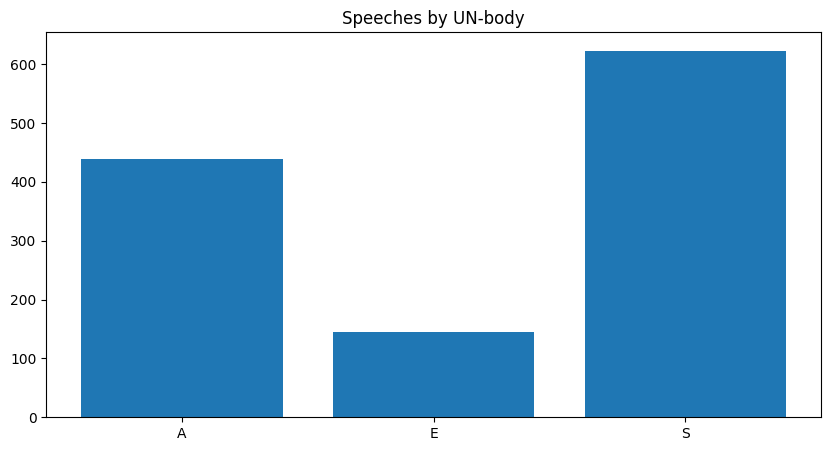

In [85]:
pldf = time_df.copy()
pldf = pldf.groupby("body")['speaker'].count().reset_index(name='countv')
pldf = pldf.sort_values("body")
plt.figure(figsize=(10,5))
plt.title("Speeches by UN-body")
plt.bar(pldf.body, pldf.countv)
plt.show()

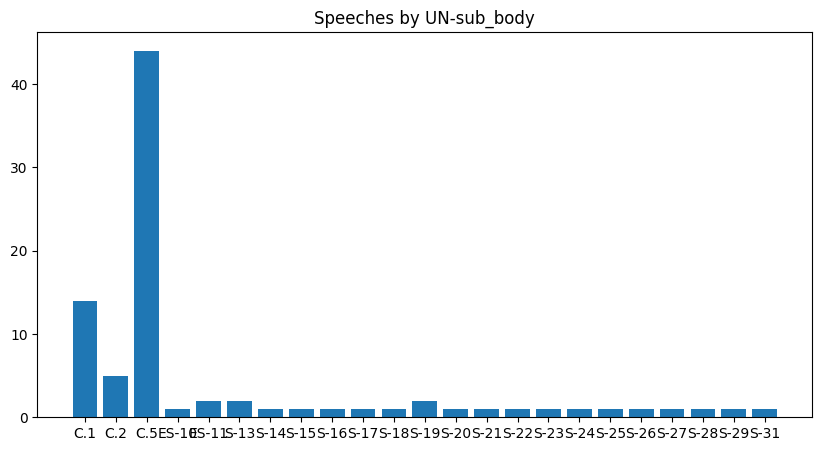

In [89]:
pldf = time_df.copy()
pldf = pldf.groupby("sub_body")['speaker'].count().reset_index(name='countv')
pldf = pldf.sort_values("sub_body")
pldf
plt.figure(figsize=(10,5))
plt.title("Speeches by UN-sub_body")
plt.bar(pldf.sub_body, pldf.countv)
plt.show()

it is stated in line 
    - "The Secretary-General: bla bla"
    - "The Secretary-General (interpreted from Russian): bla bla"
    - "5. The Secretary-General (interpreted from Russian): bla bla"

S:
- 1964: two column layout - left english, right french - starting number
- 1967: two column layout - decent text - starting number
- 1986: one column layout - text gets a bit worse - no starting number
- 1995: two column layout - computer text - no starting number
- 2025: one column layout - computer text - no starting number

A:
- 1950: two column layout - good text - starting number
- 1986: one column layout - text gets a bit worse - no starting number
- 1993_48: two column layout - computer text - no starting number
- 2024_79: one column layout - computer text - no starting number

C.
- 1950 all C.: one column layout - no starting number - (stamps over the thing)

- 1994_C.1_49: two column - computer text - no starting number 

- 1997_C.2_52: two column - computer text - starting number

- 1993_C.5_47: one column - computer text - starting number
- 1997_C.5_52: two column - computer text - starting number
- 2024_C.5_79: one column - computer text - starting number

E:
- 1946: two column layout - left english, right french - no starting number
- 1946: two column layout - starting number
- 1986: one column layout - washed computer text - no starting number
- 1995: one column layout - computer text - no starting number
- 2002: two column layout - computer text - starting number


E_1993_1993_SR.16_speeches: two column - starting number

E_2007_2007_SR.13 and 19: one column - no starting number 

A_1992_C.1_47_PV.18_speeches in chinese